# Importing Libraries And Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Getting the data
df = pd.read_csv('C:\\Users\\cheth\\Downloads\\archive (2)\\Clean_Dataset.csv')

# Exploratory Data Analysis

# Brief Overview

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [8]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [9]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['airline']=label_encoder.fit_transform(df['airline'])
df['airline'].unique()

array([4, 0, 5, 2, 3, 1])

In [10]:
df['source_city']=label_encoder.fit_transform(df['source_city'])
print(df['source_city'].unique())

[2 5 0 4 3 1]


In [11]:
df['departure_time']=label_encoder.fit_transform(df['departure_time'])
print(df['departure_time'].unique())

[2 1 4 0 5 3]


In [12]:
df['arrival_time']=label_encoder.fit_transform(df['arrival_time'])
print(df['arrival_time'].unique())

[5 4 1 0 2 3]


In [13]:
df['destination_city']=label_encoder.fit_transform(df['destination_city'])
print(df['destination_city'].unique())

[5 0 4 3 1 2]


In [14]:
df['class']=label_encoder.fit_transform(df['class'])
print(df['class'].unique())

[1 0]


In [15]:
df['stops']=label_encoder.fit_transform(df['stops'])
print(df['stops'].unique())

[2 0 1]


In [16]:
X=df.drop(['price'],axis=1)
X.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1
2,2,0,I5-764,2,1,2,1,5,1,2.17,1
3,3,5,UK-995,2,4,2,0,5,1,2.25,1
4,4,5,UK-963,2,4,2,4,5,1,2.33,1


In [17]:
y=df['price']

# Price Distribution

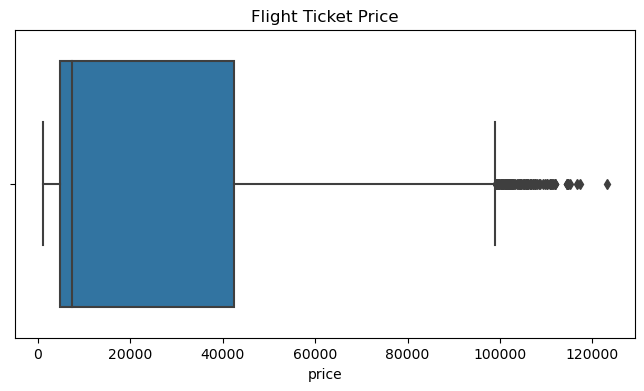

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x='price', data=df)
plt.title('Flight Ticket Price')
plt.show()

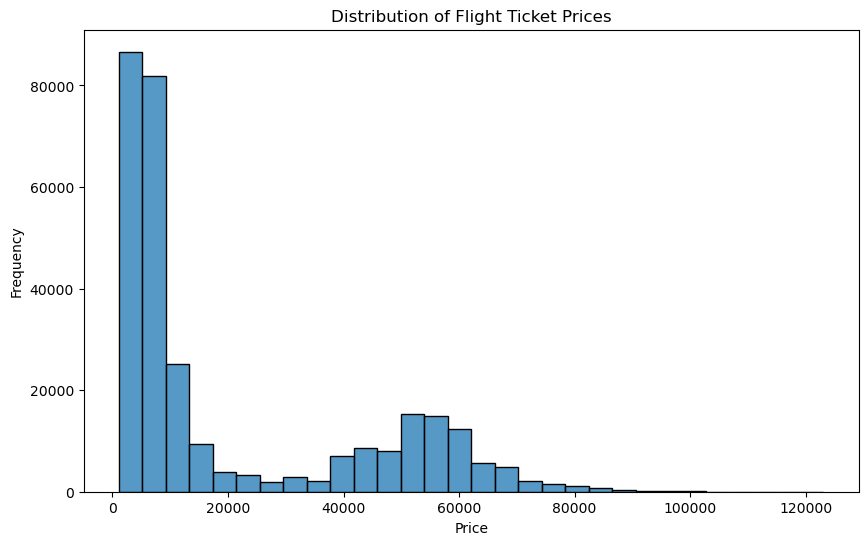

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30)
plt.title('Distribution of Flight Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Airline Analysis

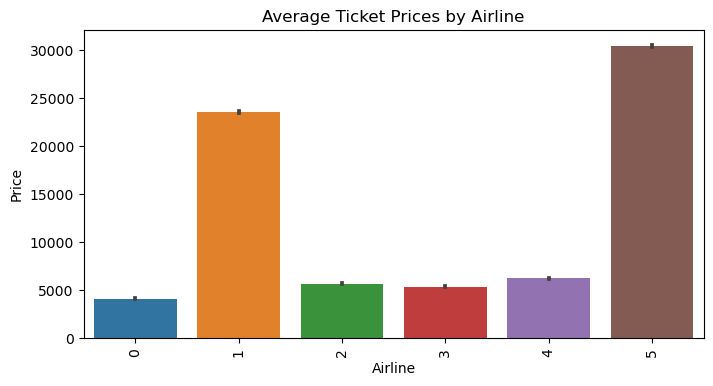

In [20]:
plt.figure(figsize=(8, 4))
sns.barplot(x='airline', y='price',data=df)
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Time-Based Patterns

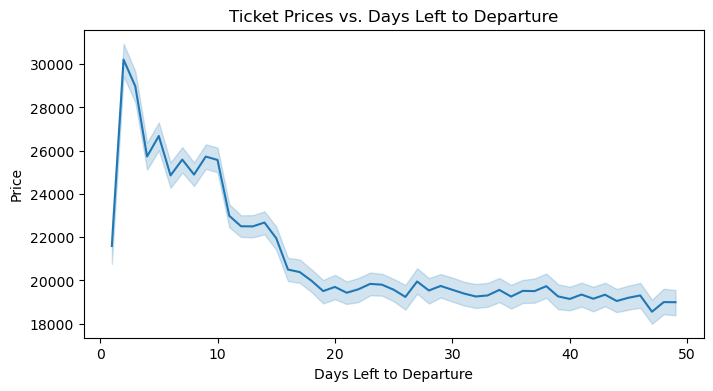

In [21]:
plt.figure(figsize=(8,4))
sns.lineplot(x='days_left', y='price', data=df)
plt.title('Ticket Prices vs. Days Left to Departure')
plt.xlabel('Days Left to Departure')
plt.ylabel('Price')
plt.show()

# Data Preprocessing

In [22]:
dataset = df.drop(columns=["flight", "arrival_time", "departure_time"])

# Training the Model

In [23]:
from sklearn.model_selection import train_test_split

y = dataset['price']
X = dataset.drop(columns=['price'])

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240122, 8)
X_test shape:  (60031, 8)
y_train shpae:  (240122,)
y_test shape:  (60031,)


In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print(regressor.coef_)

[ 2.40324277e-03  9.56209560e+02  1.22118467e+02 -3.25960182e+03
  1.15790583e+02 -4.42164092e+04  9.30730144e+01 -1.31646900e+02]


In [27]:
print(regressor.intercept_)

50606.15538650108


In [28]:
pred=regressor.predict(X_test)
pred

array([ 4690.87343309, 52481.69006567,  7578.41678111, ...,
        5694.62888931, -1090.01449711, 58403.27426921])

# To Check the Actual Price, Predicted Price & Difference

In [29]:
df1=pd.DataFrame({'actual price':y_test,'pridicted price':pred})
df1.head()

,actual price,pridicted price
27131,7366,4690.873433
266857,64831,52481.690066
141228,6195,7578.416781
288329,60160,55940.329517
97334,6578,6293.740266


In [30]:
from sklearn.metrics import r2_score

In [31]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.9043403154397829


In [32]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_accuracy=regressor.score(X_train,y_train)
print('train_accuracy:',train_accuracy)
test_accuracy=regressor.score(X_test,y_test)
print('test_accuracy:',test_accuracy)

train_accuracy: 0.9044422732201506
test_accuracy: 0.9043403154397829


In [34]:
import math
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 4625.272770653494
Mean Squared Error: 49310871.6859819
Root Mean Squared Error: 7022.1700126087735


In [35]:
graph=df1.head(10)
graph

,actual price,pridicted price
27131,7366,4690.873433
266857,64831,52481.690066
141228,6195,7578.416781
288329,60160,55940.329517
97334,6578,6293.740266
135931,4555,7554.641491
290630,23838,49532.143111
141944,3860,4753.533094
244517,32230,49534.530452
215903,76841,58227.458678


# Comparision Between Actual&prediceted price

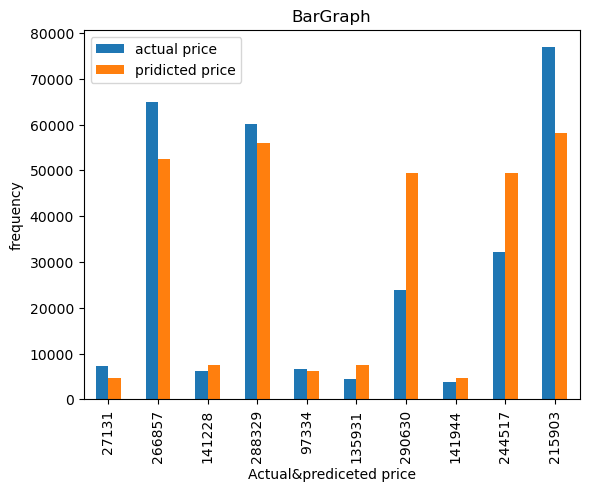

In [36]:
graph.plot(kind='bar')
plt.title('BarGraph')
plt.xlabel('Actual&prediceted price')
plt.ylabel('frequency')
plt.show()


# Training the model using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.90,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
predicted=regressor.predict(X_test)
predicted

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_accuracy=regressor.score(X_train,y_train)
print('train_accuracy:',train_accuracy)
R_test_accuracy=regressor.score(X_test,y_test)
print('test_accuracy:',R_test_accuracy)

# Comparision of Test Accuracy:Linear Regression vs Random Forest

In [ ]:
import matplotlib.pyplot as plt
linear_regression_accuracy = 0.9043403154397829
random_forest_accuracy = 0.9721507259103112
accuracy_scores = [linear_regression_accuracy, random_forest_accuracy]
model_names = ['Linear Regression', 'Random Forest Regression']
plt.bar(model_names, accuracy_scores)
plt.xlabel('Regression Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy: Linear Regression vs Random Forest Regression')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [ ]:
ann_model=MLPClassifier()
ann_model.fit(X_train,y_train)